In [1]:
%load_ext autoreload
%autoreload 2

import os
import sys
import pandas as pd
import matplotlib.pyplot as plt

sys.path.append('..')
import script.data as data

In [2]:
ticker = '002475'

In [3]:
income = data.get_IS(ticker)
incomeq = data.get_ISQ(ticker)

In [4]:
change = income[['营业总收入', '营业总成本', '归属于母公司所有者的净利润']].pct_change(periods=-1).round(3) * 100
income_change = pd.concat([income[['截止日期', '归属于母公司所有者的净利润', '基本每股收益', '稀释每股收益']], change], axis=1)
income_change

,截止日期,归属于母公司所有者的净利润,基本每股收益,稀释每股收益,营业总收入,营业总成本,归属于母公司所有者的净利润
27926,2019-12-31,4.713821e+09,0.88,0.87,74.4,75.3,73.1
27927,2018-12-31,2.722631e+09,0.51,0.51,57.1,54.2,61.0
27929,2017-12-31,1.690568e+09,0.41,0.41,65.9,69.2,46.2
27931,2016-12-31,1.156533e+09,0.40,0.40,35.7,39.8,7.2
27933,2015-12-31,1.078509e+09,0.58,0.58,39.0,38.0,71.2
27935,2014-12-31,6.300461e+08,0.50,0.50,58.9,55.1,85.4
27937,2013-12-31,3.397758e+08,0.44,0.44,45.9,50.8,29.1
27939,2012-12-31,2.630919e+08,0.48,0.48,23.2,29.1,2.3
27941,2011-12-31,2.571817e+08,0.70,0.70,152.9,147.2,122.1
27943,2010-12-31,1.157808e+08,0.55,0.55,72.8,74.9,56.2


In [5]:
change = incomeq[['营业收入', '归属于母公司所有者的净利润']].pct_change(periods=-4).round(3) * 100
incomeq_change = pd.concat([incomeq[['截止日期', '营业收入', '归属于母公司所有者的净利润']], change], axis=1)
incomeq_change[:24]

,截止日期,营业收入,归属于母公司所有者的净利润,营业收入,归属于母公司所有者的净利润
50125,2020-06-30,1.993834e+10,1.555905e+09,60.5,75.7
50126,2020-03-31,1.651328e+10,9.818702e+08,83.1,59.4
50127,2019-12-31,2.468018e+10,1.826299e+09,79.9,71.4
50128,2019-09-30,1.639540e+10,1.385983e+09,62.2,66.7
50129,2019-06-30,1.242203e+10,8.855641e+08,87.6,79.6
50130,2019-03-31,9.018705e+09,6.159748e+08,66.9,85.0
50131,2018-12-31,1.371874e+10,1.065591e+09,53.7,75.1
50132,2018-09-30,1.010549e+10,8.312122e+08,80.1,107.7
50133,2018-06-30,6.622129e+09,4.929437e+08,52.1,29.5
50134,2018-03-31,5.403604e+09,3.328842e+08,37.4,10.5


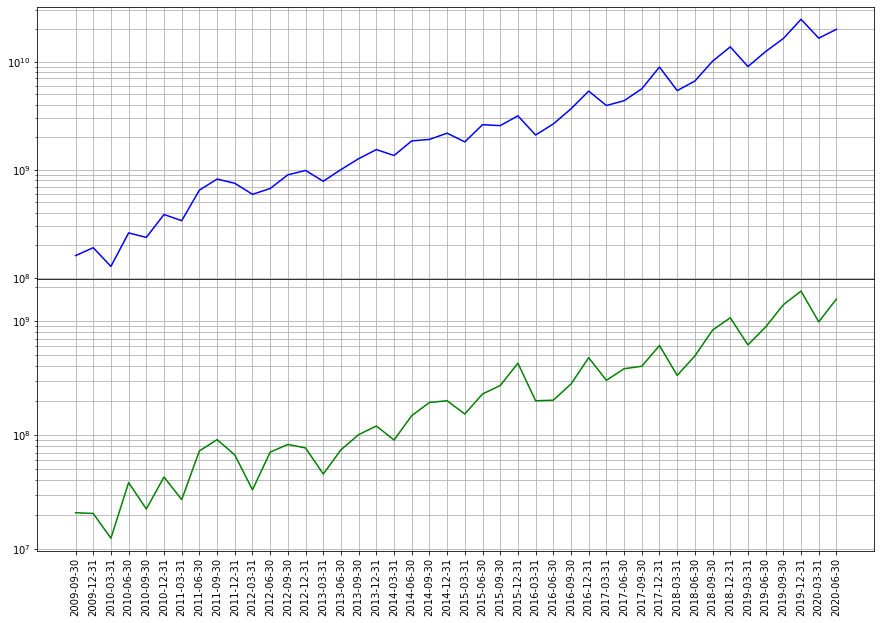

In [6]:
plt.figure(figsize=(15,10))
ax = plt.subplot(211)
plt.plot(incomeq['截止日期'][::-1], incomeq['营业收入'][::-1], 'b-')
ax.set_yscale("log")
ax.grid(True, which='both', axis='both')
ax = plt.subplot(212)
plt.plot(incomeq['截止日期'][::-1], incomeq['归属于母公司所有者的净利润'][::-1], 'g-')
ax.set_yscale("log")
ax.grid(True, which='both', axis='both')
plt.xticks(rotation=90)
plt.subplots_adjust(hspace=.0)
plt.show()

In [7]:
df = data.get_market(ticker)
df['前复权'] = df['收盘价'] * df['累积前复权因子']
df.groupby(df['交易日期'].dt.year).agg(['min', 'max'])[-10:]

交易日期               收盘价          累积前复权因子              滚动市盈率  \
            min        max    min    max       min       max      min   
交易日期                                                                    
2011 2011-01-04 2011-12-30  29.75  56.07  0.029655  0.044762  37.5252   
2012 2012-01-04 2012-12-31  23.59  36.98  0.044762  0.063027  29.3258   
2013 2013-01-04 2013-12-31  20.87  38.50  0.063027  0.094833  38.3442   
2014 2014-01-02 2014-12-31  26.97  43.78  0.094833  0.133003  36.5495   
2015 2015-01-05 2015-12-31  23.96  57.44  0.133003  0.199806  37.2518   
2016 2016-01-04 2016-12-30  17.42  31.29  0.199806  0.300629  29.1485   
2017 2017-01-03 2017-12-29  19.03  30.22  0.300629  0.452190  37.3588   
2018 2018-01-02 2018-12-28  13.13  25.82  0.452190  0.589289  23.8474   
2019 2019-01-02 2019-12-31  13.21  37.71  0.589289  0.767578  23.9927   
2020 2020-01-02 2020-10-19  34.40  62.00  0.767578  1.000000  43.6114   

                     前复权             
          max        min        max  
交易日期                                 
2011  84.1674   1.279317   2.055020  
2012  47.6799   1.294963   2.152367  
2013  59.8909   1.742062   3.169327  
2014  64.8213   3.149412   4.611209  
2015  69.0155   3.786591   7.936277  
2016  43.2978   4.995139   6.827277  
2017  56.4123   5.862259  12.525674  
2018  52.5836   7.737371  11.675556  
2019  51.0258   7.784514  28.945362  
2020  82.4913  26.404679  62.000000

In [8]:
income['毛利率'] = (1 - income['营业成本'] / income['营业收入']).round(3) * 100
income['净利率'] = (income['净利润'] / income['营业总收入']).round(3) * 100
income.set_index('截止日期')[['毛利率', '净利率']]

,毛利率,净利率
截止日期,,
2019-12-31,19.9,7.9
2018-12-31,21.0,7.8
2017-12-31,20.0,7.7
2016-12-31,21.5,8.6
2015-12-31,22.9,11.2
2014-12-31,23.3,10.1
2013-12-31,20.6,10.1
2012-12-31,21.2,10.7
2011-12-31,22.1,14.5
